<a href="https://colab.research.google.com/github/krzischp/Graph_algorithms/blob/main/BFS_Graus_de_Separa%C3%A7%C3%A3o_em_Redes_Sociais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Graus de Separação em Redes Sociais**: considere o grafo de uma rede social, em que cada perfil corresponde a um vértice, e existe uma aresta entre dois vértices apenas se os perfis correspondentes são amigos. Queremos saber qual o grau de separação médio entre dois perfis da rede. Isto é, saber quantas arestas tem, em média, um caminho mais curto que conecta dois perfis. Para tanto, elaboramos o seguinte experimento.

Temos uma **função de construção** que recebe como entrada um # (número) de vértices, um # de arestas, e que usa esses parâmetros para gerar aleatoriamente o grafo de uma rede. Também temos uma **função de testes** que recebe o grafo gerado anteriormente, realiza uma bateria de 100 testes, calcula a média dos resultados dos testes, e devolve o grau de separação médio encontrado. Em cada uma das 100 iterações a **função de testes** sorteia dois perfis (vértices) da rede e chama uma função de busca para calcular o grau de separação dos vértices sorteados. 

No entanto, essa **função de busca** não está implementada. Sua missão é implementá-la, realizar os testes para cada par (# de vértices, # de arestas) indicados na tabela a seguir, e preencher cada célula da tabela com o valor da média dos graus de separação encontrado. Atente que, na tabela estão indicados os # de arestas por vértice, mas a função de construção recebe o número total. Com a tabela preenchida, analise brevemente como cresce o grau de separação médio em função do # de vértices e de arestas do grafo.

## Contents

- [1. Primeira versao](#1)
    - [1.1. Implementaçao e verificaçao](#1-1)
    - [1.2. Execuçao dos testes](#1-2)
- [2. Versao alternante](#2)
    - [2.1. Implementaçao e verificaçao](#2-1)
    - [2.2. Execuçao dos testes](#2-2)

<a name='1'></a>
## 1. Primeira versao


<a name='1-1'></a>

### 1.1.  Implementaçao e verificaçao

Para implementar a funçao `_search` vamos primeiro implementar a **Busca em Largura**.

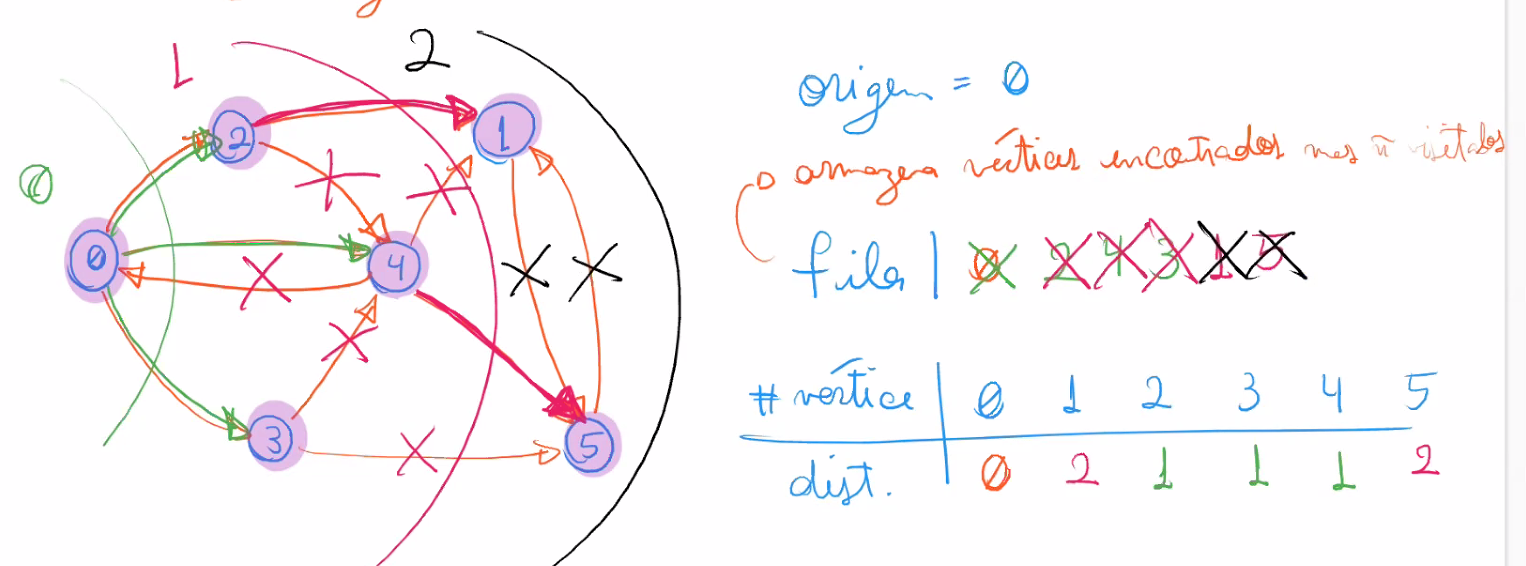

Assim construimos o dicionario das distancias e adicionamos tambem os predecessores de cada no para conseguirmos mapear o *path*.

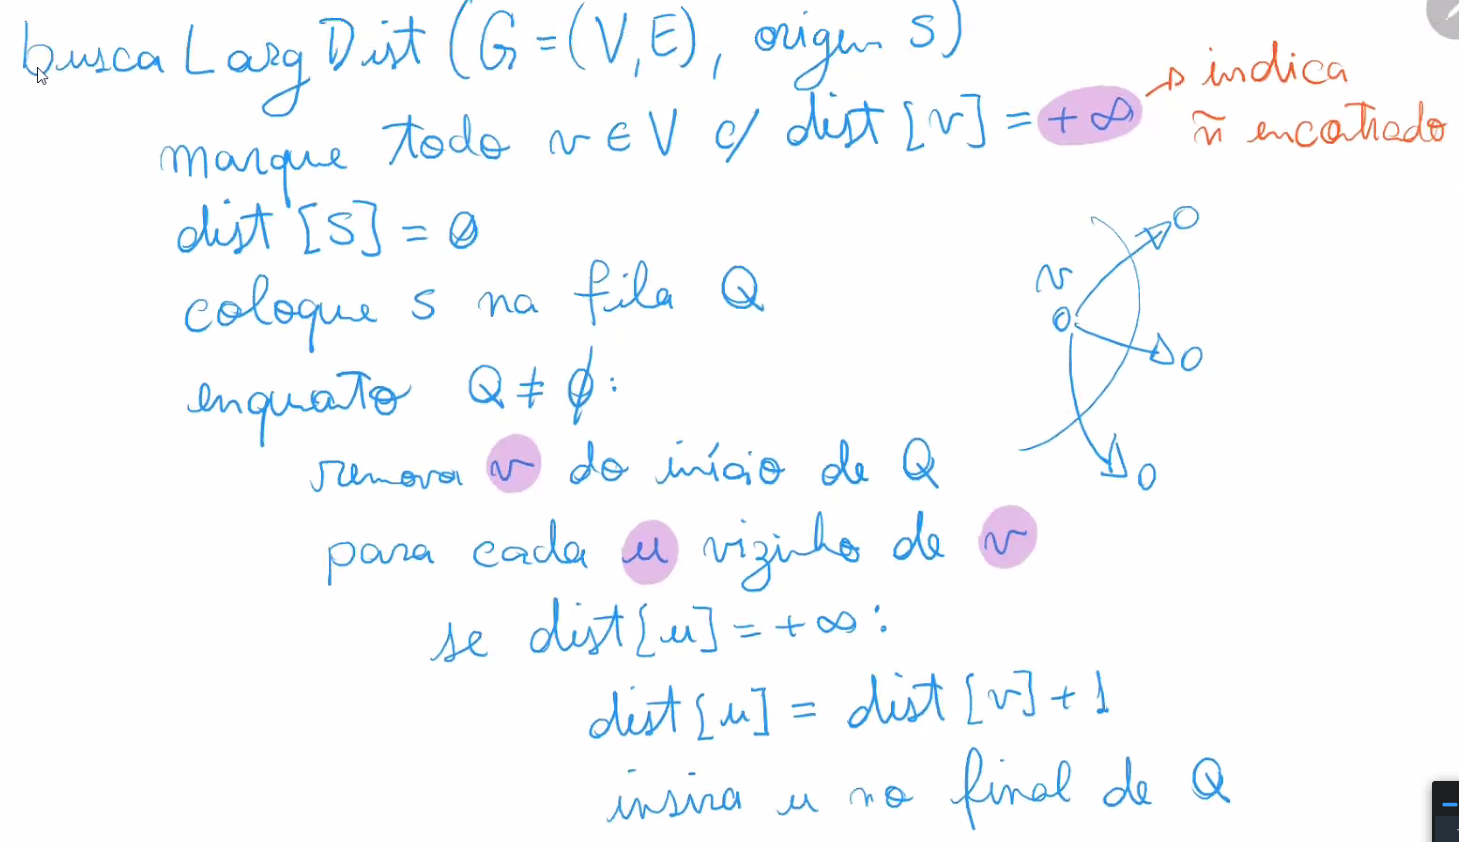

Primeiro, traduzimos esse pseudo codigo da **Busca em Largura** para *Python*.  
Adicionamos nele o rastreamento dos nos predecessores para conseguirmos mapear o caminho na funçao `_search`.

In [21]:
def BFS(graph, origin, dest, alternante=False):
    '''
    Busca em Largura a partir do no origin dentro do grafo graph

    retorna o dicionario das distancias do no origin até cada no do grafo
    '''
    dist = dict()
    q = []
    node_ids = list(set(graph))
    for id_node in node_ids:
        dist[id_node] = (-1, None)
    dist[origin] = (0, None)
    q.append(origin)
    while q :
        v = q.pop(0)
        if v == dest:
            break
        v_person = graph[v]['this']
        v_s_type = v_person.get_s_type()
        for u in graph[v]['friends']:
            u_uid = u.get_uid()
            u_s_type = u.get_s_type()
            bool_alternante = alternante and (v_s_type == u_s_type)
            if not bool_alternante and dist[u_uid][0] == -1:
                dist[u_uid] = (dist[v][0] + 1, v)
                q.append(u_uid)
    return dist

In [22]:
# -*- coding: utf-8 -*-
"""MBA - MLP - Atividade 2

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1IIQyIG6DchtF1Saqpnb6hQJ-R9iPYC9R

# **Atividade 2**

O código abaixo é responsável por gerar a rede de amigos descrita no enunciado da atividade 2. 
As únicas partes que devem ser alteradas neste código são: 
(i) a função `_search` 
e (ii) os 
parâmetros (números de vértices e arestas) da função que gera a rede. 
O entendimento do código é bem importante e pode facilitar na implementação.
"""

import random
import uuid


class Person(object):

    def __init__(self, uid, s_type):
        self._uid = uid
        self._s_type = s_type

    def get_uid(self):
        return self._uid
    
    def get_s_type(self):
        return self._s_type


class FriendNetwork(object):

    def __init__(self, people_num, connections_num, alternante=False):
        self._people_num = people_num
        self._connections_num = connections_num
        self._graph = self._generate_graph()
        self.alternante = alternante

    def __str__(self):
        s = ''
        node_ids = list(set(self._graph))
        for id_node in node_ids:
            s += "{} --------> ".format(id_node)
            neighbours = []
            if self.alternante:
                for n in self._graph[id_node]['friends']:
                    neighbours.append(
                        n.get_uid() + " SEXO:{} ".format(n.get_s_type()))
            else:
                for n in self._graph[id_node]['friends']:
                    neighbours.append(n.get_uid())
            s += ' ----> '.join(neighbours)
            s += '\n\n'
        return s

    def _generate_graph(self):

        people = []
        for person_index in range(self._people_num):
            uid = str(uuid.uuid4())
            s_type = 'female' if person_index < (
                self._people_num // 2) else 'male'
            people.append(Person(uid, s_type))

        conn_num = 0
        graph = {}
        graph_aux = {}  # criando um grafo auxiliar para agilizar algumas buscas
        while conn_num < self._connections_num:
            person, friend = random.sample(people, 2)
            person_uid = person.get_uid()
            friend_uid = friend.get_uid()

            if person_uid not in graph:
                graph[person_uid] = {
                    'this': person,
                    'friends': []
                }
                # criando um índice auxiliar para os vizinhos de cada vértice inserido no grafo
                graph_aux[person_uid] = {}

            if friend_uid not in graph:
                graph[friend_uid] = {
                    'this': friend,
                    'friends': []
                }
                # criando um índice auxiliar para os vizinhos de cada vértice inserido no grafo
                graph_aux[friend_uid] = {}

            # if person_uid == friend_uid or \
            #     friend in graph[person_uid]['friends']: # fazer essa verificação em um índice auxiliar
            #     continue
            if person_uid == friend_uid or \
                    friend_uid in graph_aux[person_uid]:  # fazer essa verificação em um índice auxiliar
                continue

            graph[person_uid]['friends'].append(friend)
            graph[friend_uid]['friends'].append(person)
            # adicionar vizinho também nos índices do grafo auxiliar
            graph_aux[person_uid][friend_uid] = True
            graph_aux[friend_uid][person_uid] = True
            conn_num += 1
        
        people_to_remove = []
        for person_uid in graph:
            friends_types = [
                *map(lambda p: p.get_s_type(), graph[person_uid]['friends'])]
            person_type = graph[person_uid]['this'].get_s_type()
            if ('male' not in friends_types or 'female' not in friends_types) and person_type in friends_types:
                people_to_remove.append(
                    {'person_uid': person_uid, 'remove_from': graph[person_uid]['friends']})

        for person_props in people_to_remove:
            for friend in person_props['remove_from']:
                person_index = [*map(lambda friend: friend.get_uid(),
                                     graph[friend.get_uid()]['friends'])].index(person_props['person_uid'])
                del graph[friend.get_uid()]['friends'][person_index]
            del graph[person_props['person_uid']]

        return graph

    def get_person_by_uid(self, uid):
        return self._graph[uid]['this']

    def _search(self, person_uid, friend_uid):
        '''
        TODO

        Esta função DEVE retornar uma lista com o caminho (incluindo origem e destino)
        percorrido para encontrar o friend_uid partindo do person_uid.

        pseudo codigo:
        camada inicial <- graph[friend_uid]


        '''

        path = []
        # acc é um accumulador que permite nao ultrapassar a quantidade de vertices total.
        # Isso pode acontecer caso person_uid e friend_uid nao sao relacionados
        # Neste caso muito raro (pois os testes sao com uma quantidade de arestas bem maior a 
        # quantidade de vertices), preferemos retornar um path de tamanho: a quantidade de vertices total do grafo
        acc = 0
        bfs = BFS(self._graph, person_uid, friend_uid, self.alternante)
        curr = friend_uid
        while curr is not None and acc < self._people_num:
            path.append(curr)
            curr = bfs[curr][1]
            acc += 1
        return path

    def get_separation_degree(self):
        total_paths_len = 0
        for i in range(100):
            person_uid, friend_uid = random.sample([*self._graph.keys()], 2)
            path = self._search(person_uid, friend_uid)
            total_paths_len += len(path) - 1

        return total_paths_len / 100


def get_separation_degree_from_network(nb_vertices, nb_arestas, alternante=False):
    friend_network = FriendNetwork(nb_vertices, nb_arestas, alternante)
    separation_degree = friend_network.get_separation_degree()
    return separation_degree


def print_results(nb_vertices, nb_arestas, alternante=False):
    print(f"\nResultado para {nb_vertices} vertices")
    print(f"\nNumero total de arestas: {nb_arestas}")
    separation_degree = get_separation_degree_from_network(
        nb_vertices, nb_arestas, alternante)
    print(f"\nMédia dos graus de separaçao encontrado: {separation_degree}")
    print('\n' + "*" * 50)


Implementamos a funcionalidade `__str__` da classe `FriendNetwork` para debogar mais facilmente e testamos `BFS` com um grafo simples de 10 pessoas e 20 conexoes.  
O numero de vertices pode ser menor que 10, pois todas as pessoas que tem apenas amigos do mesmo sexo sao removidas na criaçao do grafo.

In [ ]:
friend_network = FriendNetwork(10, 20)
print(str(friend_network))

3953da64-312e-45a8-be56-b9699d4e003c --------> 8d88ca53-7c5a-4fc1-8579-17277839235b ----> 806ad4e6-557c-41b7-9c5f-30cb648dffa4

91ed4323-1efc-4744-8009-f71f98ddabd4 --------> 8d88ca53-7c5a-4fc1-8579-17277839235b ----> d0297e62-ead7-466f-aede-db4243a57cab

806ad4e6-557c-41b7-9c5f-30cb648dffa4 --------> 8d88ca53-7c5a-4fc1-8579-17277839235b ----> 3953da64-312e-45a8-be56-b9699d4e003c

a4119889-ad3f-4fa1-851d-d23126dddc4b --------> 8e08c400-18d6-49e2-bfbb-dc4ca69d102c ----> 62582b24-d10d-4420-a6cd-6f73c6f1409d

62582b24-d10d-4420-a6cd-6f73c6f1409d --------> a4119889-ad3f-4fa1-851d-d23126dddc4b

d0297e62-ead7-466f-aede-db4243a57cab --------> 1ebe1a27-153a-4cf4-a0db-d4a0784ed0a3 ----> 91ed4323-1efc-4744-8009-f71f98ddabd4

1ebe1a27-153a-4cf4-a0db-d4a0784ed0a3 --------> 8e08c400-18d6-49e2-bfbb-dc4ca69d102c ----> d0297e62-ead7-466f-aede-db4243a57cab ----> 8e08c400-18d6-49e2-bfbb-dc4ca69d102c

8e08c400-18d6-49e2-bfbb-dc4ca69d102c --------> a4119889-ad3f-4fa1-851d-d23126dddc4b ----> 1ebe1a27-153a-

O algoritmo `BFS` implementado parece funcionar.

In [ ]:
person_uid = "3953da64-312e-45a8-be56-b9699d4e003c"
friend_uid = "1ebe1a27-153a-4cf4-a0db-d4a0784ed0a3"
friend_network._search(person_uid, friend_uid)

['3953da64-312e-45a8-be56-b9699d4e003c',
 '8d88ca53-7c5a-4fc1-8579-17277839235b',
 '91ed4323-1efc-4744-8009-f71f98ddabd4',
 'd0297e62-ead7-466f-aede-db4243a57cab',
 '1ebe1a27-153a-4cf4-a0db-d4a0784ed0a3']

In [ ]:
separation_degree = friend_network.get_separation_degree()
print(separation_degree)

3.21


Podemos verificar o resultado com o calculo na mao das medias das distancias que o algoritmo `BFS` retorna.

In [ ]:
(4 + 0 + 7 + 1 + 1 + 5 + 2 + 6 + 3) / 9

3.2222222222222223


<a name='1-2'></a>

### 1.2.  Execuçao dos testes

Agora, executamos a bateria de testes:

In [ ]:
import math
if __name__ == '__main__':
    to_test = [100, 1000, 10000, 100000]
    for nb_vertices in to_test:
        nbs_arestas = [5 * nb_vertices, int(math.sqrt(nb_vertices)) * nb_vertices, (nb_vertices / 5) * nb_vertices]
        for nb_arestas in nbs_arestas:
            print_results(nb_vertices, nb_arestas)


Resultado para 100 vertices

Numero total de arestas: 500

Média dos graus de separaçao encontrado: 2.16

**************************************************

Resultado para 100 vertices

Numero total de arestas: 1000

Média dos graus de separaçao encontrado: 1.75

**************************************************

Resultado para 100 vertices

Numero total de arestas: 2000.0

Média dos graus de separaçao encontrado: 1.51

**************************************************

Resultado para 1000 vertices

Numero total de arestas: 5000

Média dos graus de separaçao encontrado: 3.23

**************************************************

Resultado para 1000 vertices

Numero total de arestas: 31000

Média dos graus de separaçao encontrado: 1.91

**************************************************

Resultado para 1000 vertices

Numero total de arestas: 200000.0

Média dos graus de separaçao encontrado: 1.58

**************************************************

Resultado para 10000 vertices

Numer

Chegamos nesses resultados:

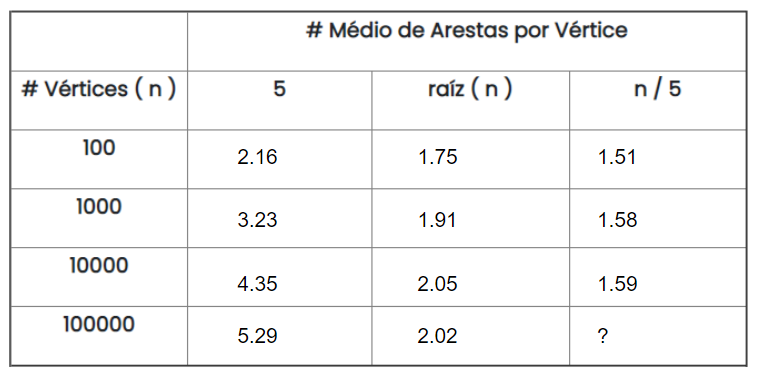

<a name='2'></a>
## 2. Versao Alternante


<a name='2-1'></a>

### 2.1.  Implementaçao e verificaçao

Adicionamos o parametro de tipo boolean **alternante** a funcionalidade `BFS` e a classe `FriendNetwork`.  


In [ ]:
friend_network = FriendNetwork(10, 20, True)
print(str(friend_network))

62a2937a-b1b1-4fd9-93f4-95cfc2b7edf7 --------> b90b496b-d5a1-4ff8-8c97-ef18e2e8f0f5 SEXO:male  ----> 2b118e2d-1aaa-4d30-b8bb-0b29e0ba02df SEXO:male 

2b118e2d-1aaa-4d30-b8bb-0b29e0ba02df --------> 2dfbcfba-6cb7-42ff-8a2e-29e6e10490f2 SEXO:female  ----> 62a2937a-b1b1-4fd9-93f4-95cfc2b7edf7 SEXO:female  ----> 7d0bc574-eb0d-4b06-b866-316f8adb5f32 SEXO:female 

37c5adff-fdbc-4274-9bf2-9a5d1f417baf --------> 11a82f8c-7bd9-4ed8-a811-d21c705ba8fe SEXO:female  ----> 2dfbcfba-6cb7-42ff-8a2e-29e6e10490f2 SEXO:female 

7d0bc574-eb0d-4b06-b866-316f8adb5f32 --------> b90b496b-d5a1-4ff8-8c97-ef18e2e8f0f5 SEXO:male  ----> 11a82f8c-7bd9-4ed8-a811-d21c705ba8fe SEXO:female  ----> 2b118e2d-1aaa-4d30-b8bb-0b29e0ba02df SEXO:male 

b90b496b-d5a1-4ff8-8c97-ef18e2e8f0f5 --------> 7d0bc574-eb0d-4b06-b866-316f8adb5f32 SEXO:female  ----> 62a2937a-b1b1-4fd9-93f4-95cfc2b7edf7 SEXO:female  ----> 6b271081-5152-46e9-928f-dd37e2505c93 SEXO:male 

2dfbcfba-6cb7-42ff-8a2e-29e6e10490f2 --------> 2b118e2d-1aaa-4d30-b8bb-0

**Note** que o teste seguinte foi efetuado antes da otimizaçao sugerida pelo professor. Ou seja, os predecessores nao aparecem no dicionario retornado pela funçao `BFS`.

In [ ]:
origin = "62a2937a-b1b1-4fd9-93f4-95cfc2b7edf7"
BFS(friend_network._graph, origin, True)

{'11a82f8c-7bd9-4ed8-a811-d21c705ba8fe': 4,
 '2b118e2d-1aaa-4d30-b8bb-0b29e0ba02df': 1,
 '2dfbcfba-6cb7-42ff-8a2e-29e6e10490f2': 2,
 '37c5adff-fdbc-4274-9bf2-9a5d1f417baf': 3,
 '49928a5a-0a5d-4a72-9cc1-23499a01501b': -1,
 '62a2937a-b1b1-4fd9-93f4-95cfc2b7edf7': 0,
 '6b271081-5152-46e9-928f-dd37e2505c93': -1,
 '7d0bc574-eb0d-4b06-b866-316f8adb5f32': 2,
 'b90b496b-d5a1-4ff8-8c97-ef18e2e8f0f5': 1}

Vamos verificar esse exemplo simples.  
O valor hash é meio dificil de acompanhar.  
Associamos uma letra a cada hash unico:  

F --------> I SEXO:male  ----> B SEXO:male 

B --------> C SEXO:female  ----> F SEXO:female  ----> H SEXO:female 

D --------> A SEXO:female  ----> C SEXO:female 

H --------> I SEXO:male  ----> A SEXO:female  ----> B SEXO:male 

I --------> H SEXO:female  ----> F SEXO:female  ----> G SEXO:male 

C --------> B SEXO:male  ----> D SEXO:male 

E --------> G SEXO:male 

A --------> H SEXO:female  ----> D SEXO:male 

G --------> E SEXO:female  ----> I SEXO:male
  
  
{'A': 4,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': -1,
 'F': 0,
 'G': -1,
 'H': 2,
 'I': 1}

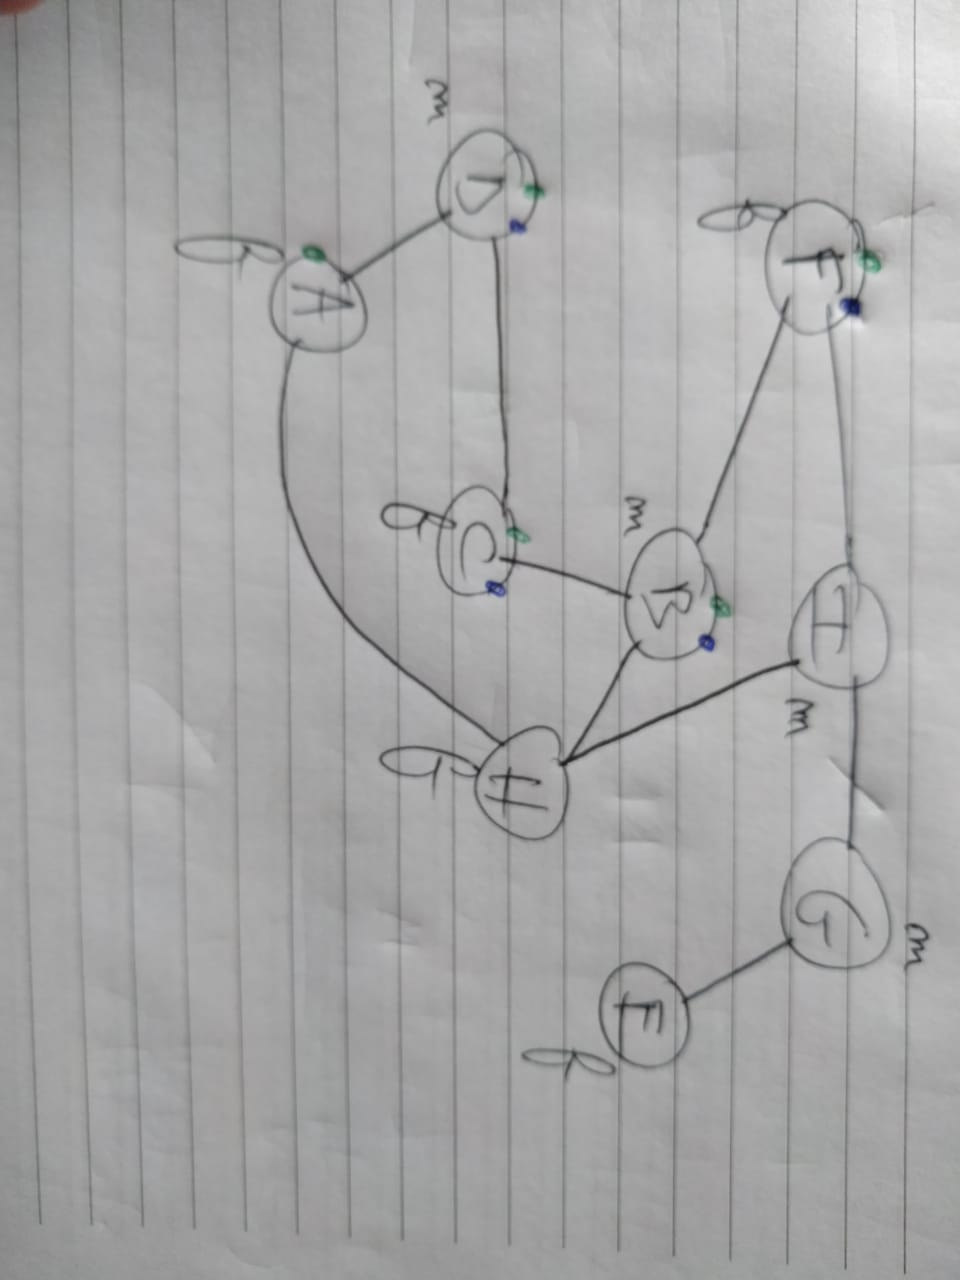

Se a gente considera os caminhos **F -> A**, **F -> D**, conseguimos reproduzi-los nesse mesmo numero de passos: 4 e 3.  
Se a gente considera o caminho **F -> E**, podemos ver que nao da para continuar depois do perfil **I** (masculino para masculino).

<a name='2-2'></a>

### 2.2.  Execuçao dos testes

Agora, executamos a bateria de testes:

In [ ]:
import math
if __name__ == '__main__':
    to_test = [100, 1000, 10000, 100000]
    for nb_vertices in to_test:
        nbs_arestas = [5 * nb_vertices, int(math.sqrt(nb_vertices)) * nb_vertices, (nb_vertices / 5) * nb_vertices]
        for nb_arestas in nbs_arestas:
            print_results(nb_vertices, nb_arestas, True)


Resultado para 10 vertices

Numero total de arestas: 50

Média dos graus de separaçao encontrado: 2.16

**************************************************

Resultado para 10 vertices

Numero total de arestas: 30

Média dos graus de separaçao encontrado: 2.25

**************************************************

Resultado para 10 vertices

Numero total de arestas: 20.0

Média dos graus de separaçao encontrado: 2.08

**************************************************

Resultado para 100 vertices

Numero total de arestas: 500

Média dos graus de separaçao encontrado: 4.67

**************************************************

Resultado para 100 vertices

Numero total de arestas: 1000

Média dos graus de separaçao encontrado: 3.08

**************************************************

Resultado para 100 vertices

Numero total de arestas: 2000.0

Média dos graus de separaçao encontrado: 2.5

**************************************************

Resultado para 1000 vertices

Numero total de aresta

Chegamos nesses resultados:

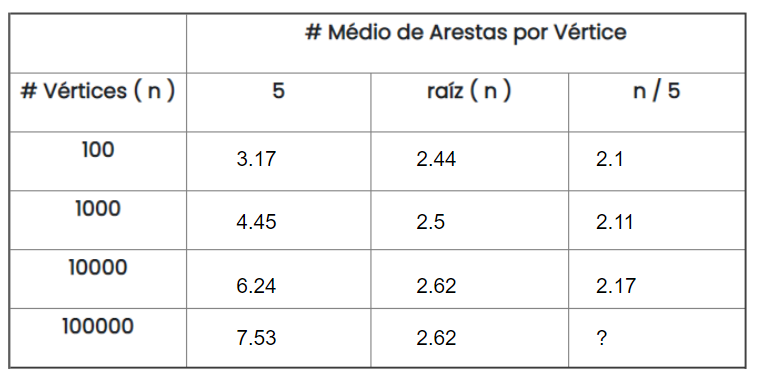

**Como essa versão do problema afetou os graus de separação?**

 *   Para uma quantidade baixa de arestas por vertice, a média dos graus de separaçao aumentou.  
 *   Para uma quantidade grande de arestas por vertice, a média dos graus de separaçao fica estavel de uma versao para a outra. Isso é intuitivo, pois mais cada pessoa do grafo tem amigos, com um numero total de perfis masculinos similar ao numero total de perfis femininos, maior é a chance de poder alternar entre um amigo e uma amiga.